# Optimizing data pruning

### Explore quality of intra- and inter-pollutant sampling per region

Data from <code>urban_sample_WRZ/subset_urban.csv</code> is found to contain *four cities* with **seven common pollutants**.

Metro regions:
    - LA
    - Dallas 
    - Baltimore
    - DC
    
Common pollutants:
    - Lead Total After 1984 (ug/L)
    - Cadmium Total (ug/L)
    - Phosphorous Total as P (mg/L)
    - Zinc Total (ug/L)
    - TSS (mg/L)
    - Copper Total (ug/L)
    - Nitrogen Kjeldahl Total (mg/L)

In [38]:
# 1. Import dependencies 
import pandas as pd
import numpy as np

In [39]:
# 2. Read in data and local vars
## File exported from *Jupyter Notebook_Urban Area and Contaminant Counts_WRZ* section 2.1
subset_urban = pd.read_csv("urban_sample_WRZ/subset_urban.csv") 

## FIXME: WRZ removed 'Nitrous nitrate' (spelling?) - Why?
pollutants = ['Alkalinity, total as CaCO3 (mg/L)',\
            'pH','Temperature_C','TDS_mg/L','Conductivity (uS/cm @25ºC)','Chloride (mg/L)',\
            'TS (mg/L)','TSS (mg/L)','Turbidity_NTU','BOD5 as O2 (mg/L)','COD as O2 (mg/L)',\
            'DO as O2 (mg/L)','Total_Organic_Carbon_as_Carbon  (mg/L)',\
            'Total Coliform (colonies/100 mL)','Fecal Coliform (colonies/100 mL)','Fecal Streptococcus (colonies/100 mL)',\
           'Total E. Coli (colonies/100 mL)','Nitrogen Total (mg/L)',\
            'Nitrogen Kjeldahl Total (mg/L)','Nitrogen Total Organic (mg/L)','Ammonia (mg/L)',\
           'Nitrogen_Nitrite (mg/L as N)','Nitrogen_Nitrate (mg/L as N) ','N02+NO3 (mg/L as N)',\
           'Phosphorous Total as P (mg/L)','Phosphorous Filtered as P (mg/L)',\
            'Phosphate Ortho as P (mg/L)','Antimony  Total (ug/L)','Antimony  Filtered (ug/L)',\
           'Arsenic Total (ug/L)','Arsenic Filtered (ug/L)','Barium, total as Ba (ug/L)',\
           'Beryllium Total (ug/L)','Beryllium Filtered (ug/L)','Cadmium Total (ug/L)',\
            'Cadmium Filtered (ug/L)','Chromium Total (ug/L)','Chromium Filtered (ug/L)',\
           'Copper Total (ug/L)','Copper Filtered (ug/L)','Cyanide Total (ug/L)',\
           'Iron, Total as Fe (ug/L)','Iron, Filtered as Fe (ug/L)',\
            'Old Lead Total Before 1985 (ug/L)','Lead Total After 1984 (ug/L)',\
           'Lead Filtered After 1984 (ug/L)','Mercury Total (ug/L)','Mercury Filtered (ug/L)',\
           'Nickel Total (ug/L)','Nickel Filtered (ug/L)','Selenium  Total (ug/L)',\
           'Selenium  Filtered (ug/L)','Silver Total (ug/L)','Silver Filtered (ug/L)',\
           'Thallium Total (ug/L)','Thallium Filtered (ug/L)','Zinc Total (ug/L)',\
           'Zinc Filtered (ug/L)','Oil and Grease Total (mg/L)',\
            'Total_Petroleum_hydrocarbon (mg/L)','Acrolein (ug/L)','Acrylonitrile (ug/L)',\
            'Benzene (ug/L)','Bromoform (ug/L)','Carbon Tetrachloride (ug/L)',\
           'Chlorobenzene (ug/L)','Chlorodibromomethane (ug/L)','Chloroethane (ug/L)',\
           '2-Chloroethylvinylether (ug/L)','Chloroform (ug/L)','Dichlorobromoethane (ug/L)',\
           '1,1-Dichloroethane (ug/L)','1,2-Dichloroethane (ug/L)','1,1-Dichloroethylene (ug/L)',\
           '1,2-Dichloropropane (ug/L)','trans-1,3-Dichloropropene (ug/L)',\
           '1,3-Dichloropropylene (ug/L)','Ethylbenzene (ug/L)','Methylbromide (ug/L)',\
           'Methylchloride (ug/L)','Methylenechloride (ug/L)',\
            '1,1,2,2-Tetrachloroethane (ug/L)','Tetrachloroethylene (ug/L)','Trichlorofluoromethane (ug/L)',\
           'Toluene (ug/L)','1,2-Trans-dichloroetylene (ug/L)','1,1,1-Trichloroethane (ug/L)',\
           '1,1,2-Trichloroethane (ug/L)','Trichloroethylene (ug/L)','Vinylchloride (ug/L)']

## Region / city names 

la_name = 'Los Angeles--Long Beach--Anaheim, CA'
bmore_name = 'Baltimore, MD' 
dc_name = 'Washington, DC--VA--MD'
dallas_name = 'Dallas--Fort Worth--Arlington, TX'

metro_region_list = [la_name, dallas_name, bmore_name, dc_name]

## Fn to specific region with station_name, year, date, and pollutants
def get_pollutants_subset(region_subset, pollutants):
    return region_subset[['Station_Name', 'year', 'date', 'NAME10'] + pollutants]

## Fn to subset to region  
def get_region_subset(region_name, pollutants):
    return get_pollutants_subset(subset_urban.loc[subset_urban['NAME10'] == region_name], pollutants) 

## Fn to return list of each region's subset data 
def get_all_region_subsets(map_this, region_list, pollutants_list):
    return list(map(map_this, region_list, pollutants_list))

## Apply subset fn to each region 
all_regions_subset = get_all_region_subsets(get_region_subset, metro_region_list, [pollutants, pollutants, pollutants, pollutants])

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (13,27,29,33,34,35,36,50,51,55,60,61,62,63,69,76,77,82,83,84,85,86,95,96,97,98,105,106,109,110,115,116,119,120,135,136,137,138,147,148,151,152,155,156,163,164,203,204,219,220) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [40]:
all_regions_subset[0].shape

(672, 94)

In [41]:
# 3. Count nulls per pollutant per region 

## Fn to count nulls per pollutant 
def count_pollutant_nulls(region_subset):
    return region_subset[pollutants].isnull().sum().to_frame().sort_values(by=0, ascending=True)

def get_all_pollutant_null_counts(counter_fn, region_subset_list):
    return list(map(counter_fn, region_subset_list))

#count_pollutant_nulls(all_regions_subset[0])

## Get counts of pollutant nulls for each region 
all_pollutant_null_counts = get_all_pollutant_null_counts(count_pollutant_nulls, all_regions_subset)

In [42]:
print("\nSummary stats of LA (index 0) null values per pollutant: ", all_pollutant_null_counts[0].describe())

print("\nLowest 5 pollutants for null count: ", all_pollutant_null_counts[0].head())

print("\nHighest 5 pollutants for null count: ", all_pollutant_null_counts[0].tail())


Summary stats of LA (index 0) null values per pollutant:                  0
count   90.000000
mean   389.288889
std    211.687349
min    138.000000
25%    183.000000
50%    425.500000
75%    559.000000
max    672.000000

Lowest 5 pollutants for null count:                                  0
Lead Total After 1984 (ug/L)  138
Cadmium Total (ug/L)          139
Copper Total (ug/L)           140
Nickel Total (ug/L)           140
Chromium Total (ug/L)         141

Highest 5 pollutants for null count:                                   0
TS (mg/L)                      672
1,3-Dichloropropylene (ug/L)   672
1,1-Dichloroethylene (ug/L)    672
Nitrogen Total Organic (mg/L)  672
DO as O2 (mg/L)                672


In [43]:
print("\nSummary stats of Dallas (index 1) null values per pollutant: ", all_pollutant_null_counts[1].describe())

print("\nLowest 5 pollutants for null count: ", all_pollutant_null_counts[1].head())

print("\nHighest 5 pollutants for null count: ", all_pollutant_null_counts[1].tail())


Summary stats of Dallas (index 1) null values per pollutant:                  0
count   90.000000
mean   369.711111
std    186.049120
min     14.000000
25%    303.500000
50%    485.000000
75%    485.000000
max    485.000000

Lowest 5 pollutants for null count:                                0
Temperature_C                14
pH                           18
Cadmium Total (ug/L)         27
Oil and Grease Total (mg/L)  27
Arsenic Total (ug/L)         28

Highest 5 pollutants for null count:                               0
Nickel Filtered (ug/L)     485
Selenium  Filtered (ug/L)  485
Silver Filtered (ug/L)     485
Zinc Filtered (ug/L)       485
Vinylchloride (ug/L)       485


In [44]:
# 4. Get pollutants that pass sample tolerance test 

sample_tolerance_list = [300, 100, 100, 100]

## Fn to subset for only passing pollutants
def get_passing_pollutants(pollutant_null_counts, sample_tolerance=300):
    return list(pollutant_null_counts[pollutant_null_counts[0] < sample_tolerance].index)

#len(get_passing_pollutants(all_pollutant_null_counts[0], 300))

def get_all_passing_pollutants(passing_fn, null_counts_list, sample_tolerance_list):
    return list(map(passing_fn, null_counts_list, sample_tolerance_list))

## Apply subset fn to each region 
all_regions_tolerant_pollutants = get_all_region_subsets(get_region_subset, metro_region_list, get_all_passing_pollutants(get_passing_pollutants, all_pollutant_null_counts, sample_tolerance_list))

In [72]:
#all_regions_tolerant_pollutants[0]

#all_regions_tolerant_pollutants = get_all_region_subsets(get_region_subset, metro_region_list, get_all_passing_pollutants(get_passing_pollutants, all_pollutant_null_counts, sample_tolerance_list))

la_n_polls = all_regions_tolerant_pollutants[0].shape[1] - 4
da_n_polls = all_regions_tolerant_pollutants[1].shape[1] - 4
bm_n_polls = all_regions_tolerant_pollutants[2].shape[1] - 4
dc_n_polls = all_regions_tolerant_pollutants[3].shape[1] - 4

all_regions_number_of_pollutants = [la_n_polls, da_n_polls, bm_n_polls, dc_n_polls]

all_regions_number_of_pollutants

[44, 19, 9, 9]

In [45]:
#all_regions_tolerant_pollutants[0].shape

def get_raw_number_observations(tolerant_pollutants):
    return tolerant_pollutants.shape[0]

def get_all_raw_number_observations(counter_fn, tolerant_pollutants_list):
    return list(map(counter_fn, tolerant_pollutants_list))

all_raw_number_observations = get_all_raw_number_observations(get_raw_number_observations, all_regions_tolerant_pollutants)

In [46]:
all_raw_number_observations

[672, 485, 409, 383]

In [47]:
# 5. Get final data that passes observation tolerance test 

observation_tolerance_list = [5, 2, 2, 3]

## Fn to subset only pasing observations 
def get_passing_observations(tolerant_pollutants, observation_tolerance=5):
    return tolerant_pollutants[tolerant_pollutants.isnull().sum(axis=1) < observation_tolerance]

len(get_passing_observations(all_regions_tolerant_pollutants[0], 5))

def get_all_passing_observations(passing_fn, tolerant_pollutants_list, observation_tolerance_list):
    return list(map(passing_fn, tolerant_pollutants_list, observation_tolerance_list))

all_regions_tolerant_observations = get_all_passing_observations(get_passing_observations, all_regions_tolerant_pollutants, observation_tolerance_list)

In [48]:
# all_regions_tolerant_observations = get_all_passing_observations(get_passing_observations, all_regions_tolerant_pollutants, observation_tolerance_list)

all_tolerant_number_observations = get_all_raw_number_observations(get_raw_number_observations, all_regions_tolerant_observations)

In [49]:
all_tolerant_number_observations

[408, 422, 402, 300]

# Optimizing tolerance 

Examine the relationships between each of the tolerance values (x axis) and number of samples or number of pollutants (y axis), respectively from sample tolerance and observation tolerance. We have the goal of minimizing loss of y values between each increase in x value. This can be visualized as an Elbow plot for each region and each tolerance type.

## Ranges to sample tolerance  

We will try values of **sample tolerance ranging from 200 - 500 null values per pollutant per region**. *Roughly 20-80% of the original counts per region*. In other words, we will try dropping pollutants from a region if they contain null values (*i.e. no value*) for 30% to 70% of the observations. 

We will try values of **observation tolerance ranging from 5 - 50 pollutants**.  


In [73]:
## Results of map fn above: 

region_names_short = ['LA', 'Dallas', 'Baltimore', 'DC']

def fill_metadata_dict(region_names, regions_meta_dict, all_raw_number_observations, all_tolerant_number_observations, n_pollutants):
    regions_meta_dict[region_names] = {}
    regions_meta_dict[region_names]['original_count'] = all_raw_number_observations
    regions_meta_dict[region_names]['tolerant_count'] = all_tolerant_number_observations
    regions_meta_dict[region_names]['ratio_count_change'] = (regions_meta_dict[region_names]['tolerant_count'] / regions_meta_dict[region_names]['original_count'])
    #all_regions_number_of_pollutants
    regions_meta_dict[region_names]['number_pollutants'] = n_pollutants
    regions_meta_dict[region_names]['ratio_pollutants_change'] = (n_pollutants / 90)
    return regions_meta_dict

# all_regions_number_of_pollutants (out of 90)

la_meta_dict = fill_metadata_dict(region_names_short[0], {}, all_raw_number_observations[0], all_tolerant_number_observations[0], all_regions_number_of_pollutants[0])
dallas_meta_dict = fill_metadata_dict(region_names_short[1], la_meta_dict, all_raw_number_observations[1], all_tolerant_number_observations[1], all_regions_number_of_pollutants[1])
bmore_meta_dict = fill_metadata_dict(region_names_short[2], dallas_meta_dict, all_raw_number_observations[2], all_tolerant_number_observations[2], all_regions_number_of_pollutants[2])
regions_meta_dict = fill_metadata_dict(region_names_short[3], bmore_meta_dict, all_raw_number_observations[3], all_tolerant_number_observations[3], all_regions_number_of_pollutants[3])

ratio_region_data_usable = [regions_meta_dict['LA']['ratio_count_change'], regions_meta_dict['Dallas']['ratio_count_change'], regions_meta_dict['Baltimore']['ratio_count_change'], regions_meta_dict['DC']['ratio_count_change']]
ratio_region_data_usable

[0.6071428571428571, 0.8701030927835052, 0.9828850855745721, 0.783289817232376]

In [74]:
ratio_region_pollutant_count = [regions_meta_dict['LA']['ratio_pollutants_change'], regions_meta_dict['Dallas']['ratio_pollutants_change'], regions_meta_dict['Baltimore']['ratio_pollutants_change'], regions_meta_dict['DC']['ratio_pollutants_change']]
ratio_region_pollutant_count

[0.4888888888888889, 0.2111111111111111, 0.1, 0.1]

## Range of values to test 

**Sample tolerance** and **observation tolerance** values can be seen below.

In [93]:
sample_tolerance_range = range(200, 510, 10)
sample_tolerance_range_list = [*sample_tolerance_range] 
print("\nRange of sample tolerance to compare per region: ", sample_tolerance_range_list)
sample_tolerance_num = len(sample_tolerance_range_list)
print("\nTotal sample tolerance values to test: ", sample_tolerance_num, "\n\n")

observation_tolerance_range = range(5, 51, 1)
observation_tolerance_range_list = [*observation_tolerance_range]
#observation_tolerance_range_list
print("\nRange of observation tolerance to compare per region: ", observation_tolerance_range_list)
observation_tolerance_num = len(observation_tolerance_range_list)
print("\nTotal observation tolerance values to test: ", observation_tolerance_num, "\n\n")


Range of sample tolerance to compare per region:  [200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500]

Total sample tolerance values to test:  31 



Range of observation tolerance to compare per region:  [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]

Total observation tolerance values to test:  46 




In [111]:
# OT.1 LA 

## Sample tolerance (x) vs number of pollutants (y)

la_sample_tolerance_range_pollutants = get_all_passing_pollutants(get_passing_pollutants, [all_pollutant_null_counts[0]] * sample_tolerance_num, sample_tolerance_range_list)
la_sample_tolerance_range_num_pollutants = [len(n) for n in la_sample_tolerance_range_pollutants]
#la_sample_tolerance_range_num_pollutants

## Observation tolerance (x) vs number of samples (y)

la_observation_tolerance_range_samples = get_all_passing_observations(get_passing_observations, [all_regions_tolerant_pollutants[0]] * observation_tolerance_num, observation_tolerance_range_list)
la_observation_tolerance_range_num_samples = [len(x) for x in la_observation_tolerance_range_samples]
#la_observation_tolerance_range_num_samples

[408,
 417,
 420,
 430,
 430,
 446,
 451,
 456,
 461,
 464,
 468,
 481,
 489,
 494,
 494,
 496,
 521,
 523,
 526,
 529,
 531,
 531,
 532,
 534,
 534,
 536,
 538,
 538,
 538,
 538,
 539,
 539,
 539,
 539,
 539,
 539,
 540,
 540,
 540,
 543,
 672,
 672,
 672,
 672,
 672,
 672]

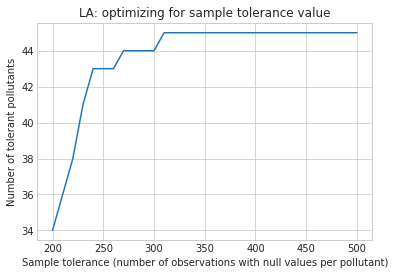

In [118]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

la_fig = plt.figure()
la_ax = plt.axes()

la_ax.plot(sample_tolerance_range_list, la_sample_tolerance_range_num_pollutants)

plt.title('LA: optimizing for sample tolerance value')
plt.xlabel('Sample tolerance (number of observations with null values per pollutant)')
plt.ylabel('Number of tolerant pollutants')

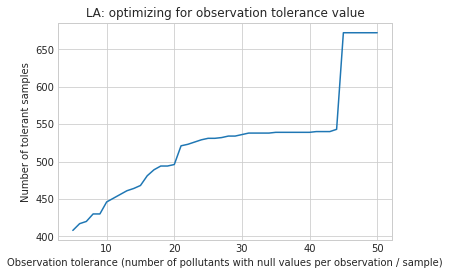

In [119]:
la_obs_fig = plt.figure()
la_obs_ax = plt.axes()

la_obs_ax.plot(observation_tolerance_range_list, la_observation_tolerance_range_num_samples)

plt.title('LA: optimizing for observation tolerance value')
plt.xlabel('Observation tolerance (number of pollutants with null values per observation / sample)')
plt.ylabel('Number of tolerant samples')

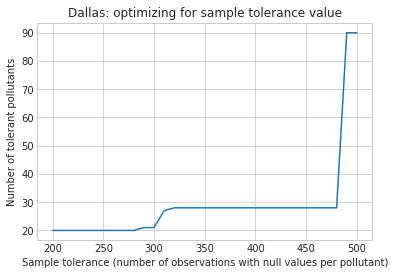

In [122]:
# OT.2 Dallas (originally...[672, 485, 409, 383] = 485 rows) 

## Sample tolerance (x) vs number of pollutants (y)

bm_sample_tolerance_range_pollutants = get_all_passing_pollutants(get_passing_pollutants, [all_pollutant_null_counts[1]] * sample_tolerance_num, sample_tolerance_range_list)
bm_sample_tolerance_range_num_pollutants = [len(n) for n in bm_sample_tolerance_range_pollutants]
#bm_sample_tolerance_range_num_pollutants

## Observation tolerance (x) vs number of samples (y)

bm_observation_tolerance_range_samples = get_all_passing_observations(get_passing_observations, [all_regions_tolerant_pollutants[1]] * observation_tolerance_num, observation_tolerance_range_list)
bm_observation_tolerance_range_num_samples = [len(x) for x in bm_observation_tolerance_range_samples]
#bm_observation_tolerance_range_num_samples

bm_fig = plt.figure()
bm_ax = plt.axes()

bm_ax.plot(sample_tolerance_range_list, bm_sample_tolerance_range_num_pollutants)

plt.title('Dallas: optimizing for sample tolerance value')
plt.xlabel('Sample tolerance (number of observations with null values per pollutant)')
plt.ylabel('Number of tolerant pollutants')

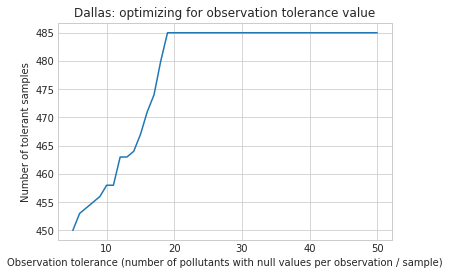

In [123]:
bm_obs_fig = plt.figure()
bm_obs_ax = plt.axes()

bm_obs_ax.plot(observation_tolerance_range_list, bm_observation_tolerance_range_num_samples)

plt.title('Dallas: optimizing for observation tolerance value')
plt.xlabel('Observation tolerance (number of pollutants with null values per observation / sample)')
plt.ylabel('Number of tolerant samples')

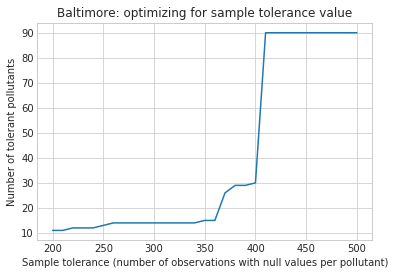

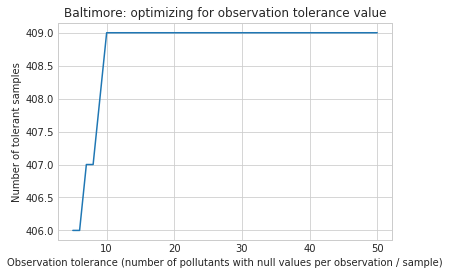

In [124]:
# OT.3 Baltimore 

## [LA: 672, Dallas: 485, Baltimore: 409, DC: 383]

## Sample tolerance (x) vs number of pollutants (y)

dc_sample_tolerance_range_pollutants = get_all_passing_pollutants(get_passing_pollutants, [all_pollutant_null_counts[2]] * sample_tolerance_num, sample_tolerance_range_list)
dc_sample_tolerance_range_num_pollutants = [len(n) for n in dc_sample_tolerance_range_pollutants]
#dc_sample_tolerance_range_num_pollutants

bm_fig = plt.figure()
bm_ax = plt.axes()

bm_ax.plot(sample_tolerance_range_list, dc_sample_tolerance_range_num_pollutants)

plt.title('Baltimore: optimizing for sample tolerance value')
plt.xlabel('Sample tolerance (number of observations with null values per pollutant)')
plt.ylabel('Number of tolerant pollutants')

## Observation tolerance (x) vs number of samples (y)

dc_observation_tolerance_range_samples = get_all_passing_observations(get_passing_observations, [all_regions_tolerant_pollutants[2]] * observation_tolerance_num, observation_tolerance_range_list)
dc_observation_tolerance_range_num_samples = [len(x) for x in dc_observation_tolerance_range_samples]
#dc_observation_tolerance_range_num_samples

bm_obs_fig = plt.figure()
bm_obs_ax = plt.axes()

bm_obs_ax.plot(observation_tolerance_range_list, dc_observation_tolerance_range_num_samples)

plt.title('Baltimore: optimizing for observation tolerance value')
plt.xlabel('Observation tolerance (number of pollutants with null values per observation / sample)')
plt.ylabel('Number of tolerant samples')

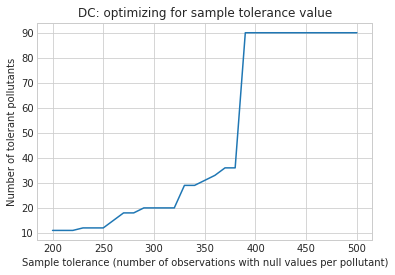

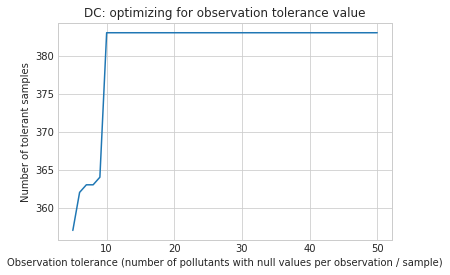

In [125]:
# OT.4 Dallas 

## Sample tolerance (x) vs number of pollutants (y)

da_sample_tolerance_range_pollutants = get_all_passing_pollutants(get_passing_pollutants, [all_pollutant_null_counts[3]] * sample_tolerance_num, sample_tolerance_range_list)
da_sample_tolerance_range_num_pollutants = [len(n) for n in da_sample_tolerance_range_pollutants]
#da_sample_tolerance_range_num_pollutants

bm_fig = plt.figure()
bm_ax = plt.axes()

bm_ax.plot(sample_tolerance_range_list, da_sample_tolerance_range_num_pollutants)

plt.title('DC: optimizing for sample tolerance value')
plt.xlabel('Sample tolerance (number of observations with null values per pollutant)')
plt.ylabel('Number of tolerant pollutants')

## Observation tolerance (x) vs number of samples (y)

da_observation_tolerance_range_samples = get_all_passing_observations(get_passing_observations, [all_regions_tolerant_pollutants[3]] * observation_tolerance_num, observation_tolerance_range_list)
da_observation_tolerance_range_num_samples = [len(x) for x in da_observation_tolerance_range_samples]
#da_observation_tolerance_range_num_samples

bm_obs_fig = plt.figure()
bm_obs_ax = plt.axes()

bm_obs_ax.plot(observation_tolerance_range_list, da_observation_tolerance_range_num_samples)

plt.title('DC: optimizing for observation tolerance value')
plt.xlabel('Observation tolerance (number of pollutants with null values per observation / sample)')
plt.ylabel('Number of tolerant samples')

In [54]:
# Statistics: summary and description of data 

#df.describe()

## Mean/median/std of all cols 
#df.mean()
#df.median()
#df.std()

## Correlation between cols 
#df.corr()

